#  Word2vec

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://radimrehurek.com/gensim/models/word2vec.html
* https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
* https://pytorch.org/text/stable/vocab.html
* https://github.com/OlgaChernytska/word2vec-pytorch
* https://www.baeldung.com/cs/nlps-word2vec-negative-sampling
* https://towardsdatascience.com/implementing-word2vec-in-pytorch-from-the-ground-up-c7fe5bf99889

## Задачи для совместного разбора

1\. Рассмотрите основные шаги подготовки данных для обучения skip-gram модели

In [ ]:
text = "Спящий котик мило моргает своими яркими глазками"

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
corpus = [
    text.lower().split()
]
corpus

[['спящий', 'котик', 'мило', 'моргает', 'своими', 'яркими', 'глазками']]

In [ ]:
vocab = build_vocab_from_iterator(corpus, )

corpus_i = [
    vocab.lookup_indices(t)
    for t in corpus
]
corpus_i

[[5, 1, 2, 3, 4, 6, 0]]

In [ ]:
example = corpus_i[0]
inputs, outputs = [], []

for idx, word in enumerate(example):
  if idx == 0 or idx == len(example) - 1:
    continue
  inputs.append(word)
  outputs.append(example[idx-1])

  inputs.append(word)
  outputs.append(example[idx+1])

In [ ]:
import pandas as pd

pd.DataFrame({"x": inputs, "y": outputs})

,x,y
0,1,5
1,1,2
2,2,1
3,2,3
4,3,2
5,3,4
6,4,3
7,4,6
8,6,4
9,6,0


In [ ]:
import torch as th

inputs = th.tensor(inputs, dtype=th.long)
outputs = th.tensor(outputs, dtype=th.long)

2\. Рассмотрите основные шаги по настройке skip-gram модели

In [ ]:
import torch.nn as nn

embeddings = nn.Embedding(num_embeddings=len(vocab), embedding_dim=300)

In [ ]:
len(inputs), embeddings(inputs).shape

(10, torch.Size([10, 300]))

In [ ]:
len(vocab)

7

In [ ]:
fc = nn.Linear(in_features=300, out_features=len(vocab))

In [ ]:
x_e = embeddings(inputs)
out = fc(x_e)
out

tensor([[-1.1099,  0.2184, -1.0295, -0.4378,  0.6595,  0.3145, -0.7379],
        [-1.1099,  0.2184, -1.0295, -0.4378,  0.6595,  0.3145, -0.7379],
        [ 0.4988, -0.8758, -0.1398,  0.7931,  0.1566, -0.4285, -0.1476],
        [ 0.4988, -0.8758, -0.1398,  0.7931,  0.1566, -0.4285, -0.1476],
        [-0.5549,  0.6089,  0.6781,  0.6207, -0.3475, -0.6316, -0.4022],
        [-0.5549,  0.6089,  0.6781,  0.6207, -0.3475, -0.6316, -0.4022],
        [-0.6011, -0.6056,  0.5310, -0.3321, -0.4234, -0.4111,  0.0590],
        [-0.6011, -0.6056,  0.5310, -0.3321, -0.4234, -0.4111,  0.0590],
        [ 0.0203, -0.1161,  0.2651, -0.0082,  0.5043,  0.7642,  0.4972],
        [ 0.0203, -0.1161,  0.2651, -0.0082,  0.5043,  0.7642,  0.4972]],
       grad_fn=<AddmmBackward0>)

In [ ]:
outputs

tensor([5, 2, 1, 3, 2, 4, 3, 6, 4, 0])

In [ ]:
model = nn.Sequential(
    nn.Embedding(num_embeddings=len(vocab), embedding_dim=300),
    nn.Linear(in_features=300, out_features=len(vocab))
)
criterion = nn.CrossEntropyLoss()

out = model(inputs)
loss = criterion(out, outputs)
loss

tensor(2.1817, grad_fn=<NllLossBackward0>)

In [ ]:
embeddings = nn.Embedding(
    num_embeddings=len(vocab),
    embedding_dim=16,
    max_norm=1
)

inputs_e = embeddings(inputs)
outputs_e = embeddings(outputs)

In [ ]:
outputs[0]

tensor(5)

In [ ]:
inputs_e[0] @ outputs_e[0]

tensor(-0.5056, grad_fn=<DotBackward0>)

In [ ]:
outputs[0], inputs[0]

(tensor(5), tensor(1))

In [ ]:
(inputs_e @ outputs_e.T).shape

torch.Size([10, 10])

In [ ]:
y_pred = th.tensor([
    [1, 0.0742]
]) # логиты
# y_pred.softmax(dim=1) # вероятности
# y_pred.sigmoid()
y = [0]

In [ ]:
o = inputs_e.view(-1, 1, 16).bmm(outputs_e.view(-1, 16, 1))
o

tensor([[[-0.5056]],

        [[-0.0040]],

        [[-0.0040]],

        [[ 0.0694]],

        [[ 0.0694]],

        [[ 0.0055]],

        [[ 0.0055]],

        [[ 0.1952]],

        [[ 0.1952]],

        [[ 0.2144]]], grad_fn=<BmmBackward0>)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите тексты новостей из файла `news_500.csv`. Удалите из текстов все знаки препинания и символы не из русского алфавита, приведите все слова к нижнему регистру и удалите стоп-слова. Разбейте текст каждой новости на фрагменты по 3 предложения и сохраните в виде списка строк. Выведите на экран длину полученного списка.

- [ ] Проверено на семинаре

In [ ]:
# text = [
#     "Спящий котик. мило моргает. своими яркими глазками. wqe qwe. qwewqewq",
#     "Спящий котик. qwewq eqw ewqe. qwewq e. мило моргает. своими яркими. глазками",
# ]

# corpus = [
#     "Спящий котик",
#     "мило моргает",
#     "своими яркими глазками",
#     "Спящий котик мило моргает",
#     "своими яркими",
#     "глазками"
# ]

# corpus = [
#     "cпящий котик мило моргает своими яркими глазками",
#     " wqe qwe qwewqewq",
#     "cпящий котик  qwewq eqw ewqe  qwewq e",
#     "мило моргает  своими яркими  глазками"
# ]

In [2]:
from nltk import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('news_500.csv')['text']
texts = df.apply(lambda x: sent_tokenize(x.lower().strip()))
texts = texts.apply(lambda x: [' '.join(x[i:i+3]) for i in range(0, len(x), 3)])

stop_words = set(stopwords.words('russian'))
tokenizer = RegexpTokenizer(r'[а-яё]+')
texts_to_Word2vec = texts.apply(lambda x: [[word for word in tokenizer.tokenize(text) if word not in stop_words] for text in x])
texts = texts.apply(lambda x: [' '.join([word for word in tokenizer.tokenize(text) if word not in stop_words]) for text in x])
texts_list = sum(texts, [])
texts_list[:3]

['президент россии владимир путин считает концепция реформирования армии должна готова ноябрю такое заявление сделал совещанием членов совета безопасности рф сообщили рбк администрации президента путин также отметил эта реформа должна проводиться учетом проблем существующих настоящее время вооруженных силах рф',
 'одну таких проблем путин охарактеризовал параллелизм армейских структур основная цель реформирования армии сделать эффективной особенное внимание следует уделить социальным вопросам обеспечения военнослужащих',
 'президент россии заявил реформирование проводиться учетом основных положений предложенных советом безопасности россии вместе путин считает массовых сокращений армии хотя отмечает военные нужды россия тратит слишком бюджетных средств причем самым эффективным образом заседание совета безопасности перенесено ноябрь нем окончательно принята концепция реформирования армии']

In [4]:
len(texts_list)

1958

<p class="task" id="2"></p>

2\. Настройте модель Word2Vec из пакета `gensim`. Для валидации выведите на экран информацию о ближайших словах для нескольких случайно выбранных токенов из обучающей выборки.

- [ ] Проверено на семинаре

In [5]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

In [6]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [7]:
texts_for_t2 = texts_to_Word2vec.sum()
model = Word2Vec(sentences=texts_for_t2, vector_size=300, window=5, min_count=1, workers=4)
len(texts_for_t2)

1958

In [8]:
def get_rand_tokens(texts, n_tokens=3, mx_int=1958):
  id_sents = np.random.randint(0, mx_int, size=n_tokens)
  words = []
  for i in id_sents:
    id_word = np.random.randint(0, len(texts[i]))
    words.append(texts[i][id_word])
  return words

In [9]:
rand_tokens = get_rand_tokens(texts_for_t2)

for tok in rand_tokens:
  print(f'{tok}:')
  print(f'most_similar: {model.wv.most_similar(tok, topn=5)}')
  print()

течение:
most_similar: [('также', 0.9739851355552673), ('сша', 0.9735426902770996), ('отметил', 0.9731498956680298), ('рф', 0.9731237888336182), ('года', 0.9729552268981934)]

оружия:
most_similar: [('человек', 0.7324371337890625), ('ранее', 0.7322854995727539), ('должны', 0.7311667203903198), ('сентября', 0.7303513884544373), ('словам', 0.7301244139671326)]

сверхдоходы:
most_similar: [('недоверии', 0.2524867653846741), ('обеспечивающие', 0.24674192070960999), ('ведомствами', 0.24585478007793427), ('милиции', 0.2343912571668625), ('втором', 0.23376980423927307)]



In [10]:
model.wv.most_similar('рф', topn=7)

[('также', 0.9949010014533997),
 ('россии', 0.9943138957023621),
 ('отметил', 0.9934729337692261),
 ('года', 0.9933315515518188),
 ('это', 0.9932998418807983),
 ('сша', 0.9932603240013123),
 ('словам', 0.9931252598762512)]

<p class="task" id="3"></p>

3. Опишите класс `W2VDataset`, который реализует в себе логику получения контекстного окна для обучения skip-gram модели. При создании словаря игнорируйте токены, которые встретились меньше 20 раз. Продемонстрируйте пример работы.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

In [11]:
from torchtext.vocab import build_vocab_from_iterator
import pandas as pd

In [12]:
# vocab = build_vocab_from_iterator(texts_for_t2, min_freq=20, specials=["<unk>"])
# vocab.set_default_index(vocab['<unk>'])

# corpus_i = [
#     vocab.lookup_indices(t)
#     for t in texts_for_t2
# ]
# corpus_i[0][:10], vocab['<unk>']

In [13]:
# examples = corpus_i[:3]
# inputs, outputs = [], []
# window = 5

# for example in examples:
#   for idx, word in enumerate(example):
#     if idx < window//2 or idx > len(example) - window//2 - 1:
#       continue

#     for i in range(window//2):
#       inputs.append(word)
#       outputs.append(example[idx-i-1])

#       inputs.append(word)
#       outputs.append(example[idx+i+1])

# res_df = pd.DataFrame({"x": inputs, "y": outputs})
# res_df = res_df[res_df!=0].dropna()
# res_df.head(10)

In [14]:
class W2VDataset:
  def __init__(self, texts, min_freq=20):
    self.texts = texts
    self.min_freq = min_freq
    self.vocab = build_vocab_from_iterator(texts_for_t2, min_freq=min_freq, specials=["<unk>"])
    self.vocab.set_default_index(self.vocab['<unk>'])

    self.corpus_i = [
        self.vocab.lookup_indices(t)
        for t in texts
    ]

  def create_dataset(self, window=5):
    inputs, outputs = [], []

    for example in self.corpus_i:
      for idx, word in enumerate(example):
        if idx < window or idx > len(example) - window - 1:
          continue

        for i in range(window):
          inputs.append(word)
          outputs.append(example[idx-i-1])

          inputs.append(word)
          outputs.append(example[idx+i+1])

    dataset = pd.DataFrame({"x": inputs, "y": outputs})
    dataset = dataset[dataset!=0].dropna().reset_index(drop=True)
    return dataset

In [15]:
context_window = W2VDataset(texts_for_t2, min_freq=20)
dset3 = context_window.create_dataset(window=5)
dset3.head(10)

,x,y
0,153.0,172.0
1,153.0,35.0
2,153.0,319.0
3,153.0,124.0
4,172.0,319.0
5,172.0,153.0
6,172.0,347.0
7,172.0,48.0
8,319.0,172.0
9,319.0,347.0


In [16]:
dset3.shape

(78440, 2)

<p class="task" id="4"></p>

4\. Реализуйте и настройте skip-gram модель. Перед началом обучения выберите случайным образом несколько слов из датасета и для каждого из них выведите на экран 3 ближайших слова в смысле косинусной близости между эмбеддингами. В процессе настройки для валидации периодически выводите на экран информацию о ближайших словах для этих слов. Выведите на экран график значения функции потерь в зависимости от номера эпохи.  

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

In [17]:
import torch.nn as nn
import torch as th
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [18]:
def get_most_sim_words(embeddings, id_rand_words, n_embs):
  cos_sim = embeddings(id_rand_words) @ embeddings(th.arange(n_embs)).T
  most_sim = cos_sim.argsort(axis=1, descending=True)[:,:4]

  for id_word, most_sim_word in zip(id_rand_words, most_sim):
    print(f'word: {context_window.vocab.lookup_tokens([id_word.item()])[0]}')
    print(f'3 most similar: {context_window.vocab.lookup_tokens(most_sim_word.tolist())[1:]}')
    print()

In [19]:
n_embs = len(context_window.vocab)
id_rand_words = th.randint(n_embs, size=(3,))

model = nn.Sequential(
    nn.Embedding(
        num_embeddings=n_embs,
        embedding_dim=300,
        max_norm=1),
    nn.Linear(in_features=300, out_features=n_embs)
)
criterion = nn.CrossEntropyLoss()
n_epochs = 50
lr = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

print('--before learning--')
get_most_sim_words(model[0], id_rand_words, n_embs)

print('--during learning--')
X_th = th.LongTensor(dset3['x'].values)
y_th = th.LongTensor(dset3['y'].values)
dset0 = TensorDataset(X_th, y_th)
loader = DataLoader(dset0, batch_size=5000)

losses = []
for epoch in range(1, n_epochs+1):
  for X_b, y_b in loader:
    y_pred = model(X_b)
    loss = criterion(y_pred, y_b)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  y_pred_all = model(X_th)
  losses.append(criterion(y_pred_all, y_th).item())

  if epoch % 10 == 0:
    print(f'{epoch=}')
    get_most_sim_words(model[0], id_rand_words, n_embs)

--before learning--
word: составил
3 most similar: ['сентября', 'рост', 'дел']

word: необходимости
3 most similar: ['первого', 'должны', 'войск']

word: экономической
3 most similar: ['изменения', 'проект', 'ситуация']

--during learning--
epoch=10
word: составил
3 most similar: ['барр', 'сравнению', 'долл']

word: необходимости
3 most similar: ['всем', 'является', 'закона']

word: экономической
3 most similar: ['мировой', 'ситуации', 'экономики']

epoch=20
word: составил
3 most similar: ['барр', 'сравнению', 'долл']

word: необходимости
3 most similar: ['закона', 'всем', 'российского']

word: экономической
3 most similar: ['мировой', 'ситуации', 'экономики']

epoch=30
word: составил
3 most similar: ['барр', 'сравнению', 'долл']

word: необходимости
3 most similar: ['закона', 'времени', 'российского']

word: экономической
3 most similar: ['мировой', 'ситуации', 'экономики']

epoch=40
word: составил
3 most similar: ['барр', 'долл', 'сравнению']

word: необходимости
3 most similar: ['за

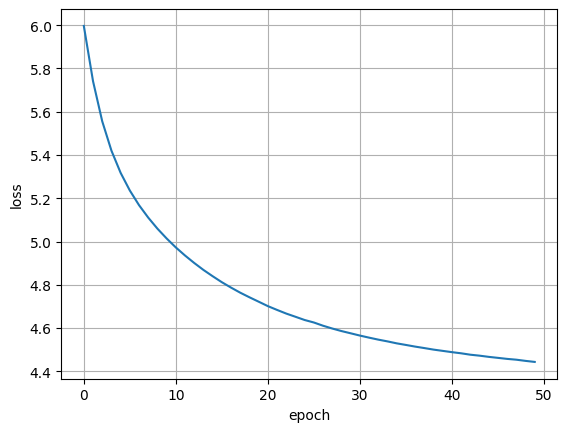

In [20]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

<p class="task" id="5"></p>

5\. Реализуйте класс `NegativeSampler`, который позволяет сгенерировать набор отрицательных примеров. Для генерации отрицательных примеров выбирайте токены пропорционально величине $C(w)^{\frac{3}{4}}$, где $C(w)$ - частота токена в корпусе.


- [ ] Проверено на семинаре

In [21]:
from nltk.util import ngrams
from collections import Counter
import numpy as np

In [22]:
class NegativeSampler:
  def __init__(self, main_dset_obj_class, main_dset=None):
    self.main_dset_obj_class = main_dset_obj_class
    self.main_dset = main_dset

  def get_params_for_choosing(self):
    all_words = sum(self.main_dset_obj_class.texts, [])
    unigrams = ngrams(all_words, n=1)
    C_unigram = Counter(unigrams)

    freqs, words_in_order = [], []
    for i in C_unigram:
      if C_unigram[i] >= self.main_dset_obj_class.min_freq:
        freqs.append(C_unigram[i])
        words_in_order.append(i[0])

    Pw_unigram = np.array(freqs)
    probs = np.power(Pw_unigram, 3/4) / np.power(Pw_unigram, 3/4).sum()
    assert probs.sum() == 1
    return words_in_order, probs

  def create_neg_samples(self, size_of_one_neg_out=3):
    set_of_all_pairs = set(self.main_dset.itertuples(index=False, name=None))
    neg_samples = []
    words_in_order, probs = self.get_params_for_choosing()
    indices_of_all_words = self.main_dset_obj_class.vocab.lookup_indices(words_in_order)

    # neg_words_inp = np.random.choice(words_in_order, n_neg_samples, p=probs, replace=False)
    neg_out = []
    neg_in = []
    for inp in indices_of_all_words:
      added_neg_samples = 0
      # one_out = self.main_dset[self.main_dset['x']!=inp]['y'].sample(size_of_one_neg_out).values.tolist()
      # neg_out.append(one_out)
      # neg_in.append(np.repeat(self.main_dset_obj_class.vocab.lookup_indices([inp]), len(one_out)))

      while added_neg_samples < size_of_one_neg_out:
        neg_words_out = np.random.choice(indices_of_all_words, 1, p=probs)[0]
        if (inp, neg_words_out) not in set_of_all_pairs:
          neg_samples.append([inp, neg_words_out])
          added_neg_samples += 1

    # while added_neg_samples < n_neg_samples:
    #   neg_words_inp_out = tuple(np.random.choice(words_in_order, 2, p=probs))
    #   if neg_words_inp_out not in set_of_all_pairs:
    #     neg_samples.append(self.main_dset_obj_class.vocab.lookup_indices(list(neg_words_inp_out)))
    #     added_neg_samples += 1
    # neg_out = np.concatenate(neg_out)
    # neg_in = np.concatenate(neg_in)
    # return pd.DataFrame(np.c_[neg_in, neg_out], columns=['x', 'y'])

    return pd.DataFrame(neg_samples, columns=['x', 'y'])

In [23]:
neg_samples_try = NegativeSampler(context_window, dset3)
neg_samples_try.create_neg_samples(3) # shape[0] = 590 (unique words) * 3

,x,y
0,49,210
1,49,320
2,49,503
3,2,77
4,2,398
...,...,...
1765,251,267
1766,251,89
1767,489,2
1768,489,11


<p class="task" id="6"></p>

6\. Реализуйте и настройте skip-gram модель с использованием negative sampling. Перед началом обучения выберите случайным образом несколько слов из датасета и для каждого из них выведите на экран 3 ближайших слова в смысле косинусной близости между эмбеддингами. В процессе настройки для валидации периодически выводите на экран информацию о ближайших словах для этих слов. Выведите на экран график значения функции потерь в зависимости от номера эпохи.  

- [ ] Проверено на семинаре

In [129]:
dset6_positive = dset3.copy()
dset6_positive['label'] = 1
dset6_positive.head()

,x,y,label
0,153.0,172.0,1
1,153.0,35.0,1
2,153.0,319.0,1
3,153.0,124.0,1
4,172.0,319.0,1


In [130]:
neg_sam = NegativeSampler(context_window, dset3).create_neg_samples(15)
neg_sam['label'] = 0
neg_sam.head()

,x,y,label
0,49,112,0
1,49,16,0
2,49,45,0
3,49,79,0
4,49,45,0


In [131]:
neg_sam.shape

(8850, 3)

In [132]:
dset6 = pd.concat([dset6_positive, neg_sam]).reset_index(drop=True)
dset6

,x,y,label
0,153.0,172.0,1
1,153.0,35.0,1
2,153.0,319.0,1
3,153.0,124.0,1
4,172.0,319.0,1
...,...,...,...
87285,489.0,334.0,0
87286,489.0,213.0,0
87287,489.0,140.0,0
87288,489.0,8.0,0


In [139]:
# dset6_2 = dset6.copy()
# dset6_2['false_label'] = 1 - dset6_2['label']
# dset6_2

In [150]:
class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.in_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.out_embedding = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, target, context):
        in_embeds = self.in_embedding(target)
        out_embeds = self.out_embedding(context)
        return in_embeds, out_embeds

In [151]:
def get_most_sim_words_model2(model, id_rand_words, n_embs):
  cos_sim = model.in_embedding(id_rand_words) @ model.out_embedding(th.arange(n_embs)).T
  most_sim = cos_sim.argsort(axis=1, descending=True)[:,:4]

  for id_word, most_sim_word in zip(id_rand_words, most_sim):
    print(f'word: {context_window.vocab.lookup_tokens([id_word.item()])[0]}')
    print(f'3 most similar: {context_window.vocab.lookup_tokens(most_sim_word.tolist())[1:]}')
    print()

In [172]:
n_embs = len(context_window.vocab)
id_rand_words = th.randint(n_embs, size=(3,))

model = SkipGramModel(n_embs, 300)

n_epochs = 10
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = criterion = nn.BCEWithLogitsLoss()

print('--before learning--')
get_most_sim_words_model2(model, id_rand_words, n_embs)

print('--during learning--')
inp_th = th.LongTensor(dset6['x'].values)
out_th = th.LongTensor(dset6['y'].values)
labels = th.LongTensor(dset6['label'].values)
dset0 = TensorDataset(inp_th, out_th, labels)
loader = DataLoader(dset0, batch_size=5000, shuffle=True)

losses = []
for epoch in range(1, n_epochs+1):
  run_loss = 0
  for inp_b, out_b, labels_b in loader:
    in_embeds, out_embeds = model(inp_b, out_b)
    scores = th.sum(th.matmul(in_embeds, out_embeds.t()), dim=1).to(th.float32)
    loss = criterion(scores, labels_b.to(th.float32))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    run_loss += loss.item()*len(labels_b)

  losses.append(run_loss/len(inp_th))

  if epoch % 3 == 0:
    print(f'{epoch=}')
    get_most_sim_words_model2(model, id_rand_words, n_embs)

--before learning--
word: отвечая
3 most similar: ['губернатора', 'правительством', 'американских']

word: также
3 most similar: ['нового', 'факт', 'великобритании']

word: планируется
3 most similar: ['сообщалось', 'вновь', 'доллар']

--during learning--
epoch=3
word: отвечая
3 most similar: ['ремезов', 'губернатора', 'очень']

word: также
3 most similar: ['должен', 'нового', 'момент']

word: планируется
3 most similar: ['сообщалось', 'вновь', 'доллар']

epoch=6
word: отвечая
3 most similar: ['ремезов', 'губернатора', 'американских']

word: также
3 most similar: ['должен', 'нового', 'великобритании']

word: планируется
3 most similar: ['сообщалось', 'вновь', 'доллар']

epoch=9
word: отвечая
3 most similar: ['ремезов', 'губернатора', 'американских']

word: также
3 most similar: ['должен', 'нового', 'великобритании']

word: планируется
3 most similar: ['вновь', 'сообщалось', 'день']



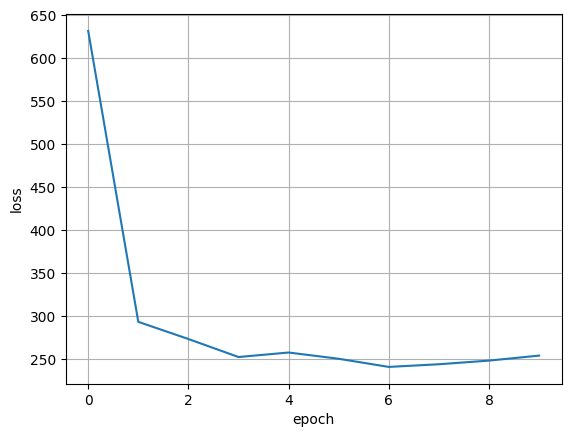

In [173]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

## Обратная связь
- [ ] Хочу получить обратную связь по решению